In [ ]:
from google.colab import files
uploaded = files.upload()


Saving DENV4.fasta to DENV4 (1).fasta
Saving DENV1.fasta to DENV1 (1).fasta
Saving DENV2.fasta to DENV2 (1).fasta
Saving DENV3.fasta to DENV3 (1).fasta


In [ ]:
import os
print(os.listdir('/content'))


['.config', 'DENV4.fasta', 'DENV3.fasta', 'DENV1.fasta', 'DENV3 (1).fasta', 'DENV2.fasta', 'DENV4 (1).fasta', 'DENV2 (1).fasta', 'DENV1 (1).fasta', 'sample_data']


In [ ]:
!pip install biopython


In [ ]:
import os
from Bio import SeqIO
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np


folder_path = "/content"

# Label mapping
label_map = {
    "DENV1": 0,
    "DENV2": 1,
    "DENV3": 2,
    "DENV4": 3,
}

# Extract sequences and labels
data = []
for file in os.listdir(folder_path):
    if file.endswith(".fasta") or file.endswith(".fa"):
        for serotype in label_map:
            if serotype in file.upper():
                label = label_map[serotype]
                break
        else:
            continue

        filepath = os.path.join(folder_path, file)
        for record in SeqIO.parse(filepath, "fasta"):
            sequence = str(record.seq).upper()
            data.append([sequence, label])

# Create DataFrame
df = pd.DataFrame(data, columns=["sequence", "label"])
print("Sample data:")
print(df.head())
print(f"Total samples: {len(df)}")


Sample data:
                                            sequence  label
0  ATGAACCAACGAAAAAAGGTGGTTAAACCACCTTTCAATATGCTGA...      3
1  ATGAACCAACGAAAAAAGGTGGTTAGACCACCTTTCAATATGCTGA...      3
2  ATGAACCAACGAAAAAAGGTGGTTAGACCACCTTTCAATATGCTGA...      3
3  ATGAACCAACGAAAAAAGGTGGTTAGACCACCTTTCAATATGCTGA...      3
4  ATGAACCAACGAAAAAAGGTGGTTAGACCACCTTTCAATATGCTGA...      3
Total samples: 11984


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Example values – update these according to your dataset
vocab_size = 5000        # Total number of unique tokens in your sequences
embedding_dim = 128      # Dimension of the embedding vectors
num_classes = 4          # Number of DENV classes (e.g., DENV1 to DENV4)
max_len = 100            # Length of padded sequences

# Define the model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim),
    LSTM(64),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Build the model to display summary correctly
model.build(input_shape=(None, max_len))  # None for batch size
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 100, 128)       │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 693,828 (2.65 MB)

 Trainable params: 693,828 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

# Convert DNA sequence to numeric encoding
def encode_sequence(seq):
    mapping = {'A': 1, 'C': 2, 'G': 3, 'T': 4}
    return [mapping.get(base, 0) for base in seq]

# Apply encoding
df['encoded'] = df['sequence'].apply(encode_sequence)

# Pad sequences to uniform length
from tensorflow.keras.preprocessing.sequence import pad_sequences
MAX_LEN = 1000  # or any value suitable to your average sequence length
X = pad_sequences(df['encoded'], maxlen=MAX_LEN, padding='post')

# Labels
y = df['label'].values

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Now train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=5,
    batch_size=64
)


Epoch 1/5
120/120 ━━━━━━━━━━━━━━━━━━━━ 172s 1s/step - accuracy: 0.6721 - loss: 0.8183 - val_accuracy: 0.9859 - val_loss: 0.0277
Epoch 2/5
120/120 ━━━━━━━━━━━━━━━━━━━━ 175s 1s/step - accuracy: 0.9860 - loss: 0.0347 - val_accuracy: 0.9885 - val_loss: 0.0245
Epoch 3/5
120/120 ━━━━━━━━━━━━━━━━━━━━ 186s 2s/step - accuracy: 0.9892 - loss: 0.0278 - val_accuracy: 0.9885 - val_loss: 0.0256
Epoch 4/5
120/120 ━━━━━━━━━━━━━━━━━━━━ 180s 1s/step - accuracy: 0.9861 - loss: 0.0278 - val_accuracy: 0.9885 - val_loss: 0.0227
Epoch 5/5
120/120 ━━━━━━━━━━━━━━━━━━━━ 235s 2s/step - accuracy: 0.9883 - loss: 0.0245 - val_accuracy: 0.9891 - val_loss: 0.0216


In [ ]:
from sklearn.metrics import classification_report

# Predict class probabilities on test data
y_pred_probs = model.predict(X_test)

# Convert to class labels
y_pred = y_pred_probs.argmax(axis=1)

# Classification metrics
print("Classification Report:")
print(classification_report(y_test, y_pred, digits=4))


75/75 ━━━━━━━━━━━━━━━━━━━━ 12s 158ms/step
Classification Report:
              precision    recall  f1-score   support

           0     0.9856    0.9990    0.9922       958
           1     1.0000    0.9857    0.9928       767
           2     1.0000    0.9940    0.9970       501
           3     0.9942    1.0000    0.9971       171

    accuracy                         0.9937      2397
   macro avg     0.9949    0.9947    0.9948      2397
weighted avg     0.9938    0.9937    0.9937      2397



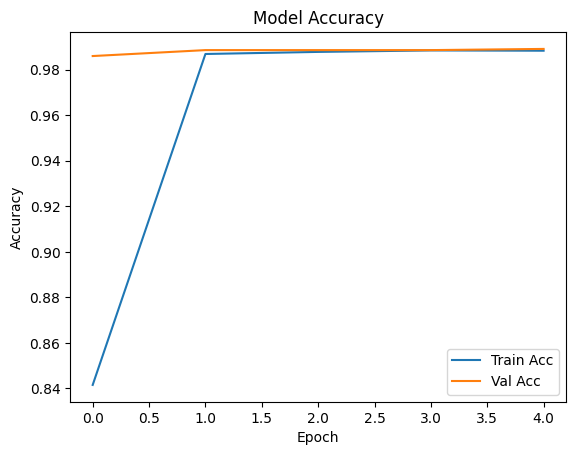

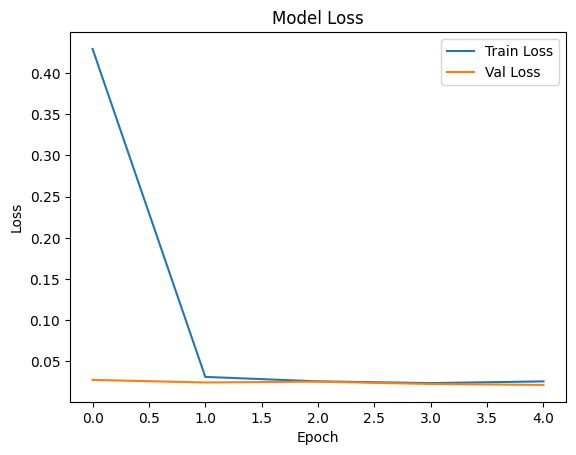

In [ ]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


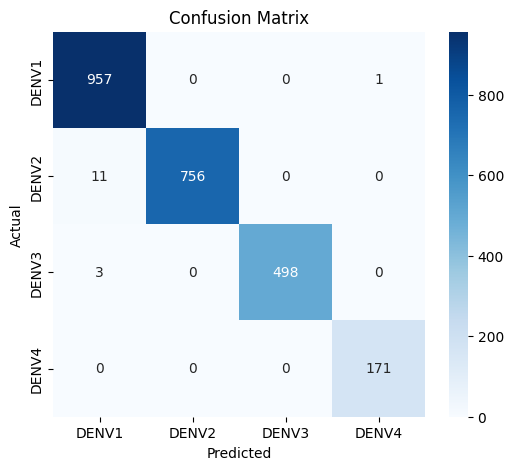

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['DENV1', 'DENV2', 'DENV3', 'DENV4'], yticklabels=['DENV1', 'DENV2', 'DENV3', 'DENV4'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


FNN(Feed Forward Neural Network)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 256)            │       173,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 214,724 (838.77 KB)

 Trainable params: 214,724 (838.77 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
120/120 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.3973 - loss: 19.1559 - val_accuracy: 0.9270 - val_loss: 0.7134
Epoch 2/5
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7019 - loss: 0.8774 - val_accuracy: 0.9536 - val_loss: 0.3035
Epoch 3/5
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7692 - loss: 0.5722 - val_accuracy: 0.9922 - val_loss: 0.1963
Epoch 4/5
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8089 - loss: 0.4807 - val_accuracy: 0.9228 - val_loss: 0.1975
Epoch 5/5
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7965 - loss: 0.4777 - val_accuracy: 0.9896 - val_loss: 0.1357
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Classification Report:

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       958
           1       0.99      1.00      1.00       767
           2       1.00      1.00      1.00       501
           3       1.00      0.85      0.92       171

    accuracy               

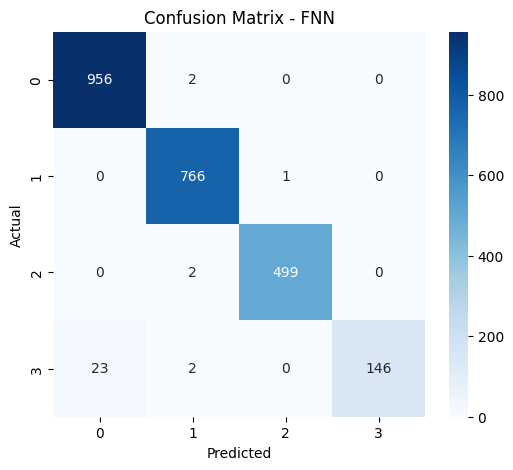

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# ----- Step 1: K-mer Encoding -----
def get_kmers(sequence, k=3):
    return ' '.join([sequence[i:i+k] for i in range(len(sequence)-k+1)])

df['kmers'] = df['sequence'].apply(lambda x: get_kmers(x, k=3))

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['kmers']).toarray()

# ----- Step 2: Label Encoding -----
le = LabelEncoder()
y = le.fit_transform(df['label'])
y_cat = to_categorical(y)

# ----- Step 3: Train-Test Split -----
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=42)

# ----- Step 4: FNN Model -----
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(X.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(4, activation='softmax'))  # 4 classes

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# ----- Step 5: Train -----
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

# ----- Step 6: Evaluate -----
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)
y_true = y_test.argmax(axis=1)

# Classification Report
print("\nClassification Report:\n")
target_names = [str(cls) for cls in le.classes_]
print(classification_report(y_true, y_pred_classes, target_names=target_names))


# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - FNN')
plt.show()


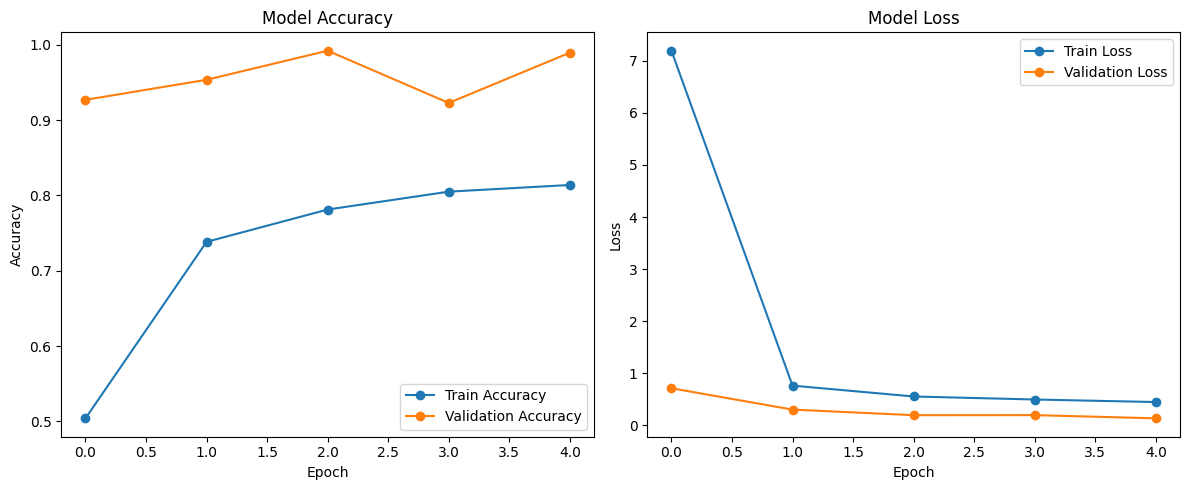

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


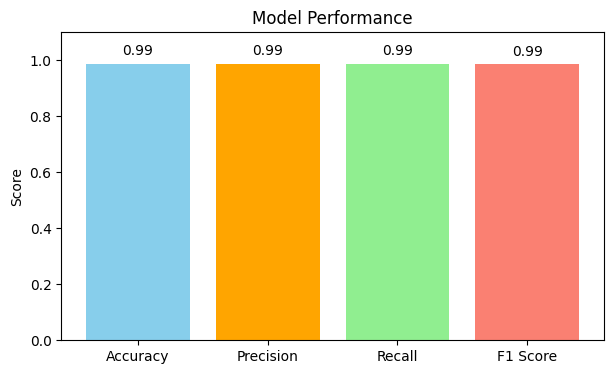

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Step 1: Calculate metrics
accuracy = accuracy_score(y_true, y_pred_classes)
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')

# Step 2: Put them in lists
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = [accuracy, precision, recall, f1]

# Step 3: Plot the bar graph
plt.figure(figsize=(7, 4))
bars = plt.bar(metrics, scores, color=['skyblue', 'orange', 'lightgreen', 'salmon'])
plt.ylim(0, 1.1)
plt.title('Model Performance')
plt.ylabel('Score')

# Add values on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.03, f'{height:.2f}', ha='center')

plt.grid(False)  # remove grid
plt.show()


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(X_train.shape[1],)))  # More neurons
model.add(Dropout(0.4))  # Higher dropout
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dense(4, activation='softmax'))  # Adjust according to your class count

optimizer = Adam(learning_rate=0.0005)  # Slower learning to improve generalization
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.4425 - loss: 13.6172 - val_accuracy: 0.9964 - val_loss: 0.0426
Epoch 2/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9743 - loss: 0.1364 - val_accuracy: 0.9964 - val_loss: 0.0421
Epoch 3/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9859 - loss: 0.0967 - val_accuracy: 0.9979 - val_loss: 0.0465
Epoch 4/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9910 - loss: 0.0775 - val_accuracy: 0.9979 - val_loss: 0.0144
Epoch 5/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9954 - loss: 0.0461 - val_accuracy: 0.9964 - val_loss: 0.0282
Epoch 6/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9935 - loss: 0.0423 - val_accuracy: 0.9953 - val_loss: 0.0418
Epoch 7/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9918 - loss: 0.0718 - val_accuracy: 0.9953 - val_loss: 0.0172
Epoch 8/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9869 - loss: 0.0705 - val_accuracy: 

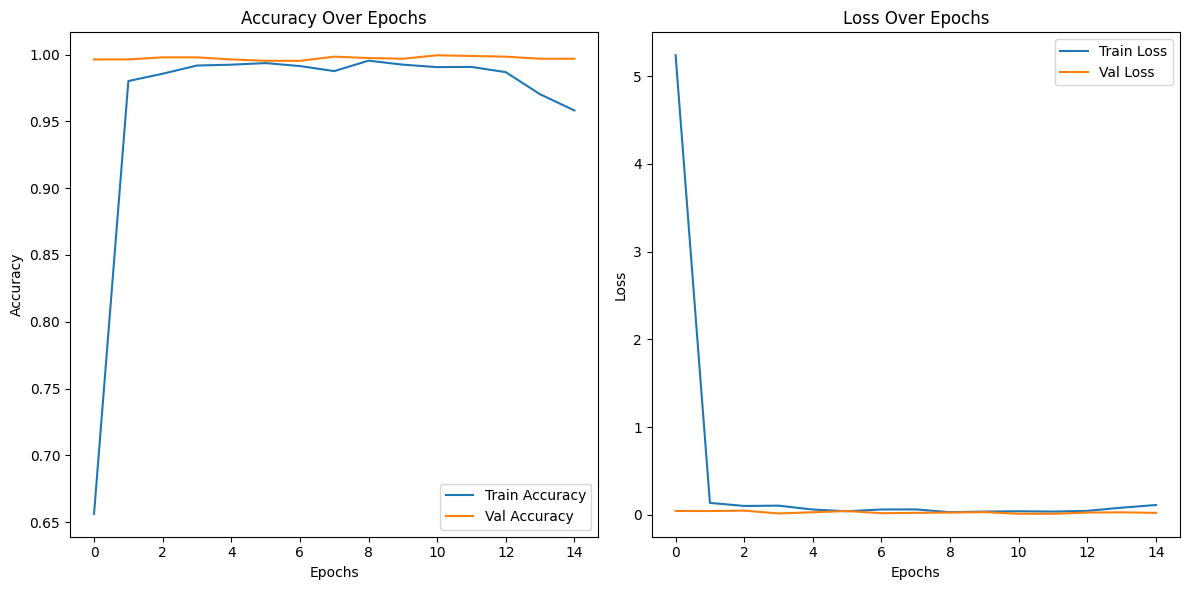

75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Classification Report:

[0 1 2 3]

Classification Report:

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       958
           1       1.00      0.99      1.00       767
           2       1.00      1.00      1.00       501
           3       1.00      0.99      1.00       171

    accuracy                           1.00      2397
   macro avg       1.00      1.00      1.00      2397
weighted avg       1.00      1.00      1.00      2397



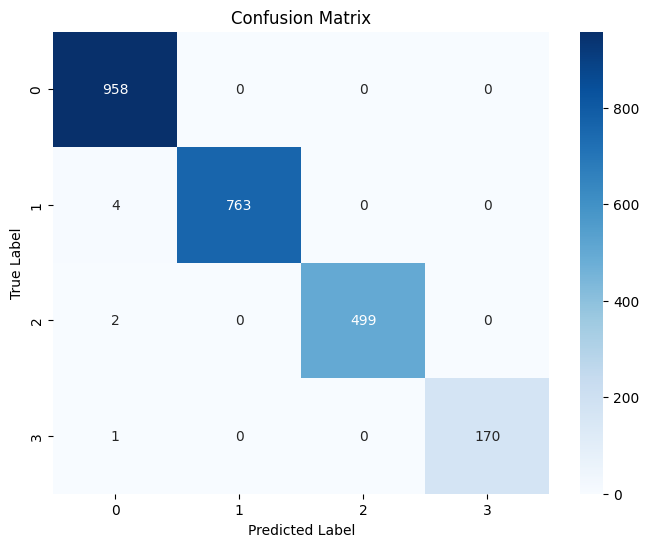

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd


label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # This will convert labels into integers

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Define the FFNN model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))  # Input layer
model.add(Dropout(0.2))  # Dropout layer to reduce overfitting
model.add(Dense(64, activation='relu'))  # Hidden layer
model.add(Dense(4, activation='softmax'))  # Output layer (4 classes, softmax for classification)

# Compile the model with Sparse Categorical Cross-Entropy loss
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train,
                    validation_split=0.2,
                    epochs=15,
                    batch_size=64,
                    verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# You can plot the accuracy and loss graphs from history
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Classification Report
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Print classification report
print("\nClassification Report:\n")
# Ensure the label encoder has been fitted properly
print(label_encoder.classes_)

# Print classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_classes, target_names=[str(i) for i in label_encoder.classes_]))

# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


<function matplotlib.pyplot.show(close=None, block=None)>

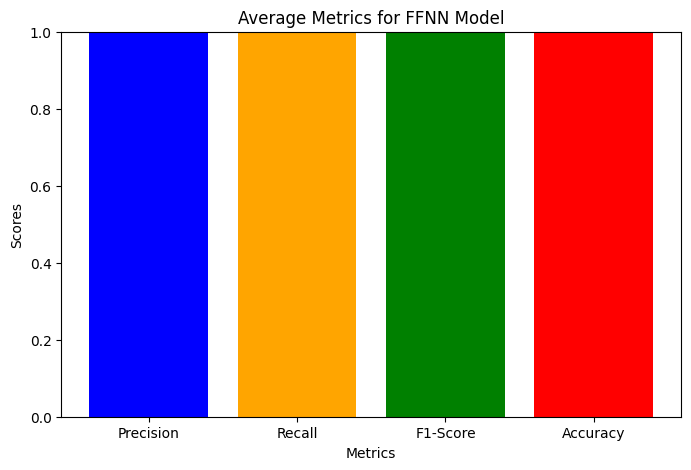

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, accuracy_score

# Predict the classes for the test set
y_pred_classes = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_classes, axis=1)  # In case of multi-class classification

# Compute the classification report
report = classification_report(y_test, y_pred_classes, output_dict=True)

# Extracting the metrics for macro avg (average across classes)
avg_precision = report['macro avg']['precision']
avg_recall = report['macro avg']['recall']
avg_f1_score = report['macro avg']['f1-score']
avg_accuracy = accuracy_score(y_test, y_pred_classes)

# Create a list of metrics and corresponding values
metrics = ['Precision', 'Recall', 'F1-Score', 'Accuracy']
values = [avg_precision, avg_recall, avg_f1_score, avg_accuracy]

# Plotting the bar graph
plt.figure(figsize=(8, 5))
plt.bar(metrics, values, color=['blue', 'orange', 'green', 'red'])
plt.ylim(0, 1)  # Set y-axis from 0 to 1 for better comparison

# Adding labels and title
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Average Metrics for FFNN Model')
plt.show


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


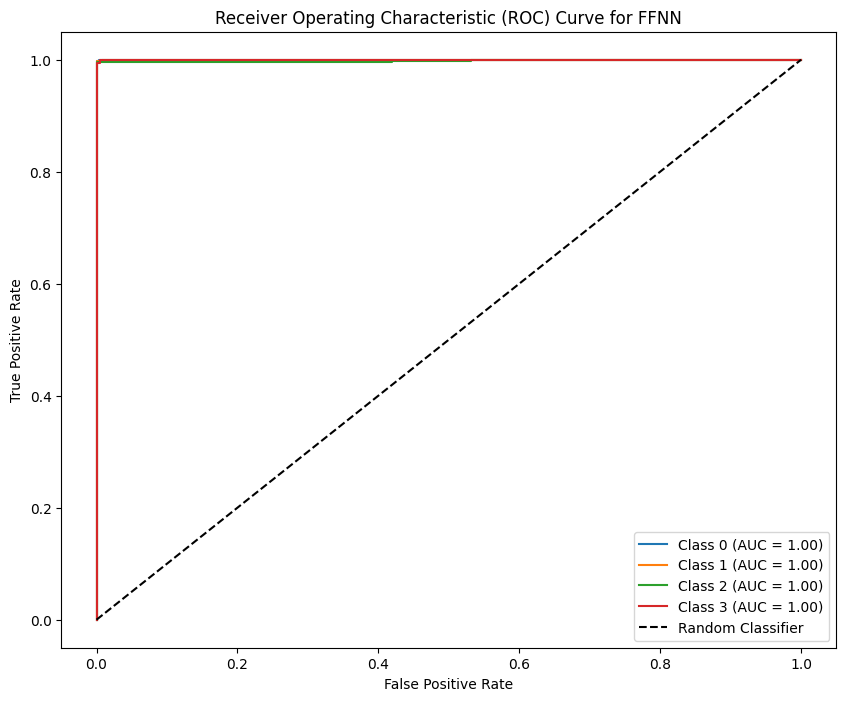

Overall ROC AUC Score (macro average): 1.00


In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer

# One-hot encode the true labels (y_test) for multi-class classification
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)

# Get the predicted probabilities for each class
y_pred_prob = model.predict(X_test)

# Calculate the ROC AUC score for each class (you can use "macro" for average score across classes)
roc_auc = roc_auc_score(y_test_bin, y_pred_prob, average='macro', multi_class='ovr')

# Plotting the ROC curve for each class
plt.figure(figsize=(10, 8))

# Compute ROC curve for each class
for i in range(y_pred_prob.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

# Plot the diagonal (chance level)
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")

# Set plot labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for FFNN')
plt.legend(loc="lower right")
plt.show()

# Print the overall ROC AUC score
print(f"Overall ROC AUC Score (macro average): {roc_auc:.2f}")


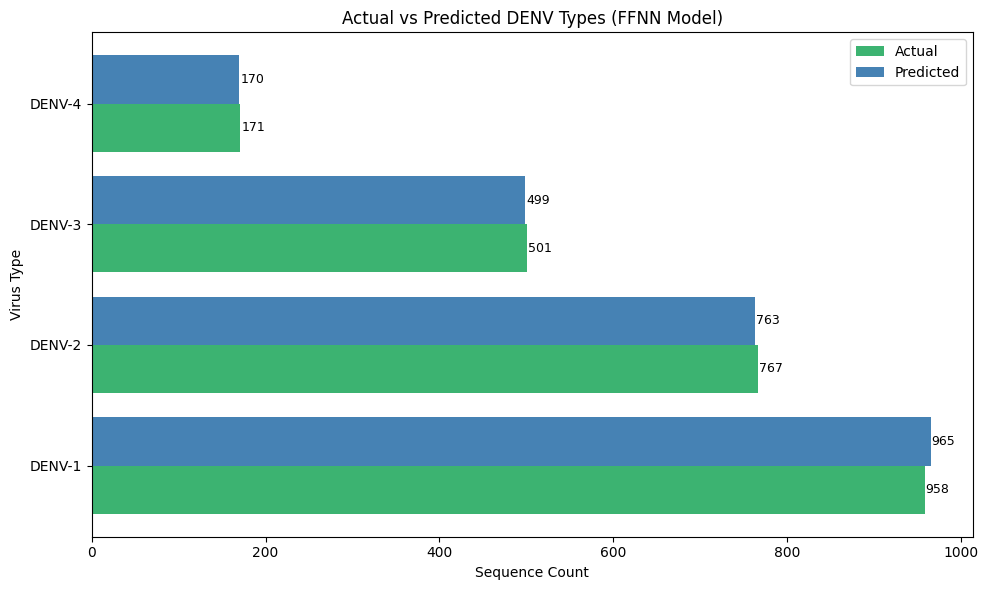

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Class labels
class_labels = ['DENV-1', 'DENV-2', 'DENV-3', 'DENV-4']

# Count actual and predicted samples per class
actual_counts = pd.Series(y_test).value_counts().sort_index()
predicted_counts = pd.Series(y_pred_classes).value_counts().sort_index()

# Ensure all labels are covered
actual = [actual_counts.get(i, 0) for i in range(len(class_labels))]
predicted = [predicted_counts.get(i, 0) for i in range(len(class_labels))]

# Horizontal bar chart setup
y = np.arange(len(class_labels))
bar_width = 0.4

plt.figure(figsize=(10, 6))
bars1 = plt.barh(y - bar_width/2, actual, height=bar_width, label='Actual', color='mediumseagreen')
bars2 = plt.barh(y + bar_width/2, predicted, height=bar_width, label='Predicted', color='steelblue')

# Add data labels on bars
for bar in bars1:
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2, str(int(bar.get_width())), va='center', fontsize=9)

for bar in bars2:
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2, str(int(bar.get_width())), va='center', fontsize=9)

# Axis labels and title
plt.yticks(y, class_labels)
plt.xlabel('Sequence Count')
plt.ylabel('Virus Type')
plt.title('Actual vs Predicted DENV Types (FFNN Model)')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
from Bio import SeqIO

def load_sequences(file_path):
    return [str(record.seq) for record in SeqIO.parse(file_path, "fasta")]

serotypes = {
    "DENV-1": load_sequences("DENV1.fasta"),
    "DENV-2": load_sequences("DENV2.fasta"),
    "DENV-3": load_sequences("DENV3.fasta"),
    "DENV-4": load_sequences("DENV4.fasta"),
}


In [ ]:
def sequence_identity(seq1, seq2):
    min_len = min(len(seq1), len(seq2))
    matches = sum(a == b for a, b in zip(seq1[:min_len], seq2[:min_len]))
    return matches / min_len


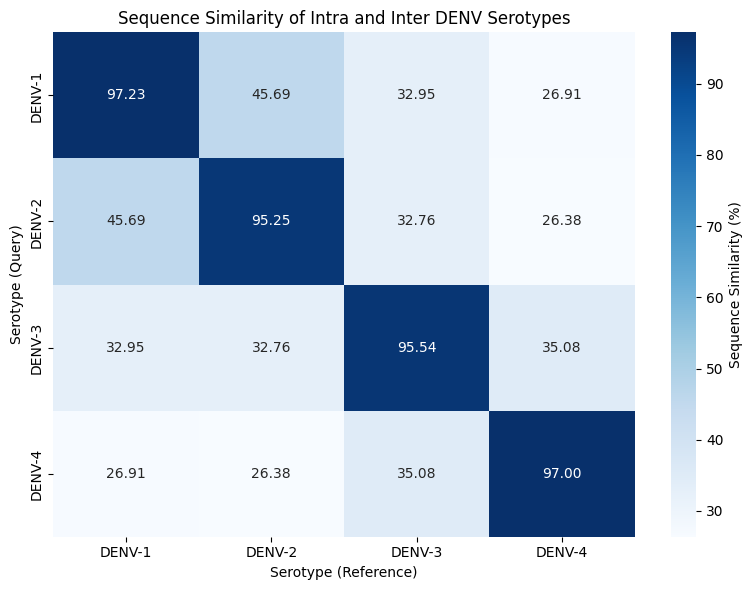

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Label to serotype map (ensure proper mapping)
label_to_serotype = {0: "DENV-1", 1: "DENV-2", 2: "DENV-3", 3: "DENV-4"}

# Make sure the label is integer and map correctly
df['label'] = df['label'].astype(int)
df['serotype'] = df['label'].map(label_to_serotype)

# Drop rows where serotype mapping failed (just in case)
df = df.dropna(subset=['serotype'])

# Group and take 5 sequences per serotype
serotype_groups = df.groupby('serotype')['sequence'].apply(lambda x: x.iloc[:5].tolist()).to_dict()

# Function to compute sequence identity
def sequence_identity(seq1, seq2):
    min_len = min(len(seq1), len(seq2))
    matches = sum(a == b for a, b in zip(seq1[:min_len], seq2[:min_len]))
    return matches / min_len

# Prepare similarity matrix
serotypes = list(serotype_groups.keys())
similarity_matrix = pd.DataFrame(index=serotypes, columns=serotypes, dtype=float)

# Compute average pairwise similarity
for sero1 in serotypes:
    for sero2 in serotypes:
        similarities = [sequence_identity(s1, s2) for s1 in serotype_groups[sero1] for s2 in serotype_groups[sero2]]
        avg_similarity = sum(similarities) / len(similarities)
        similarity_matrix.loc[sero1, sero2] = round(avg_similarity * 100, 2)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(similarity_matrix, annot=True, fmt=".2f", cmap="Blues", cbar_kws={'label': 'Sequence Similarity (%)'})
plt.title("Sequence Similarity of Intra and Inter DENV Serotypes")
plt.xlabel("Serotype (Reference)")
plt.ylabel("Serotype (Query)")
plt.tight_layout()
plt.show()
